# IronKaggle

Goal: Predict House Prices using [King Country Housing Data](https://www.kaggle.com/datasets/minasameh55/king-country-houses-aa?resource=download)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score, classification_report, mean_squared_error



import warnings
warnings.filterwarnings('ignore')

## 1: Load Dataset

In [4]:
#loading the dataset

df = pd.read_csv("/content/drive/MyDrive/Ironhack/IronKaggle/king_ country_ houses_aa.csv")

## 2: Explore the data

to understand its structure — features, target variable, shape, and data types

### 2.1 Basics: size, shape, data types

In [ ]:
df.dtypes

,0
id,int64
date,object
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2.2 EDA

Some exploratory analyses to underdtand the data

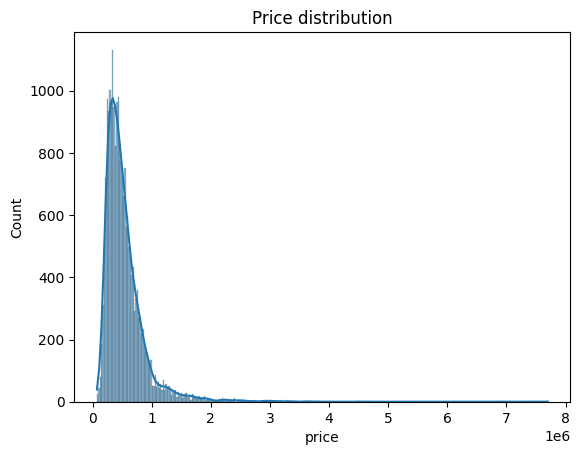

In [6]:
#Price distribution
sns.histplot(df["price"], kde=True)
plt.title("Price distribution")
plt.tight_layout
plt.show()

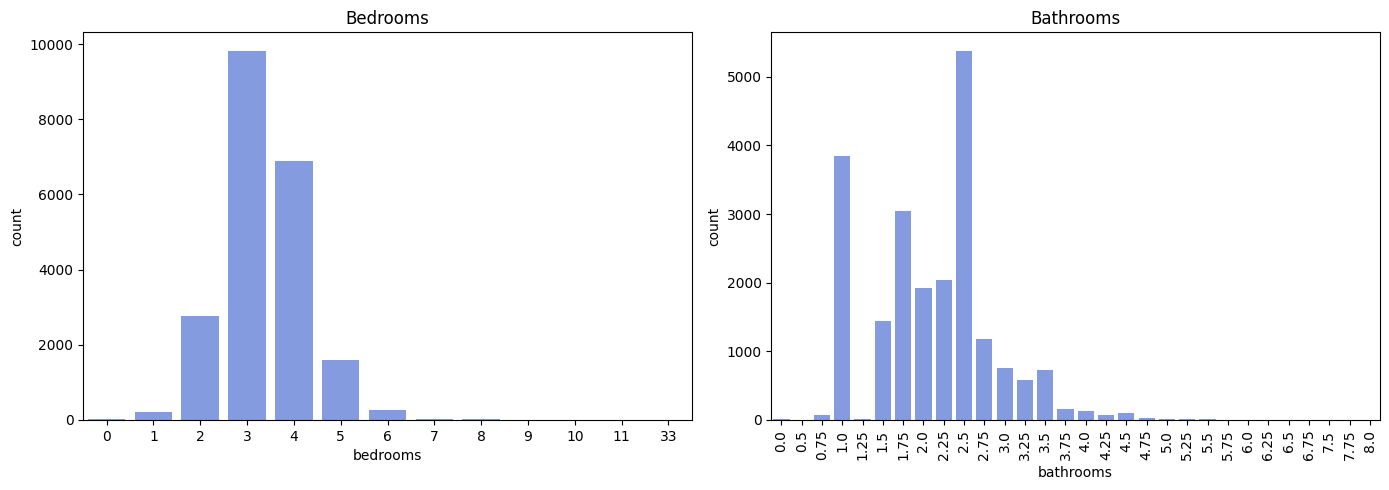

In [ ]:
#plotting no. of bedrooms and bathrooms
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

sns.countplot(
    data=df,
    x='bedrooms',
    color="#7595EE",
    #errorbar=None,
    ax=axes[0]
)
axes[0].set_title("Bedrooms")
#axes[0].tick_params(axis="x", rotation=90)

sns.countplot(
    data=df,
    x='bathrooms',
    color="#7595EE",
    #errorbar=None,
    ax=axes[1]
)
axes[1].set_title("Bathrooms")
axes[1].tick_params(axis="x", rotation=90)

plt.tight_layout()
plt.show()

## 2.3 Notes

- housing data
- 21 columns, 21.6K rows
- date: formatted weirdly, cut off last 7 characters for more normal dates. likely not important column though
- sqft_living15 : Living room area in 2015(implies-- some renovations)
- sqft_lot15 : lotSize area in 2015(implies-- some renovations)
- condition : It determines the overall condition of a house on a scale of 1 to 5.
- grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
- view
  - documentation: This feature determines whether a house has been viewed or not 0 means no 1 means yes.
  - actual data: scale from 0 to 4


Question: difference between grade and condition? is grade "quality it was built as" and condition "current condition"?

## 3: Clean the dataset
duplicates, nulls, missing values, data transformation, dropping columns

### 3.1 Cleaning

In [ ]:
df_copy = df.copy()       #copy for safekeeping before I do anything

In [ ]:
#duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#missing values

print("Total missing values: ", df.isnull().sum().sum())

Total missing values:  0


data validation

In [ ]:
#houses with 0 bedrooms or bathrooms

print(f"Houses with 0 bedrooms: {len(df[df.bedrooms == 0])}")
print(f"Houses with 0 bathrooms: {len(df[df.bathrooms == 0])}")

Houses with 0 bedrooms: 13
Houses with 0 bathrooms: 10


In [ ]:
#theory: if sqft_living is different from sqft_living15, a renovation has happened, and the yr_renovated should not be 0

df_different_living_area = df[df["sqft_living"] != df["sqft_living15"]]

df_missing_yr = [df_different_living_area['yr_renovated'] == 0]

df_missing_yr

#note: this is a lot larger than expected, true for 88% of data

[0         True
 1        False
 2         True
 3         True
 4         True
          ...  
 21604     True
 21606     True
 21607     True
 21609     True
 21611     True
 Name: yr_renovated, Length: 19047, dtype: bool]

changing data types

In [7]:
#date: remove what i dont care about

df["date"] = df["date"].str.replace("T000000", "", regex=False)

### 3.2 Dropping Columns

In [8]:
# Create a list of columns to drop
cols_to_drop = ["price","id"] #encode cats. zip code turn back to numeric.

# Drop the columns from the dataset
features = df.drop(columns = cols_to_drop,axis = 1)

### 3.3 Notes:
- no non-null, no missing values
- date: unwieldy format
- zipcode: turn into categorical
- 88% of data has a different sqft_living than sqft_living15, and yr_renovated = 0. I assume at least one of these metrics is incorrect, but I cannot determine which one, so will not backfill yr_renovated.

## 4: Split the dataset

In [17]:
#define X and Y

X = features
y = df["price"]

In [18]:
#split dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5: Explore correlations

In [19]:
# Select numerical columns
num_cols = X.select_dtypes(include=["int64", "float64"])
# Select categorical columns
cat_cols = X.select_dtypes(exclude=["int64", "float64"])

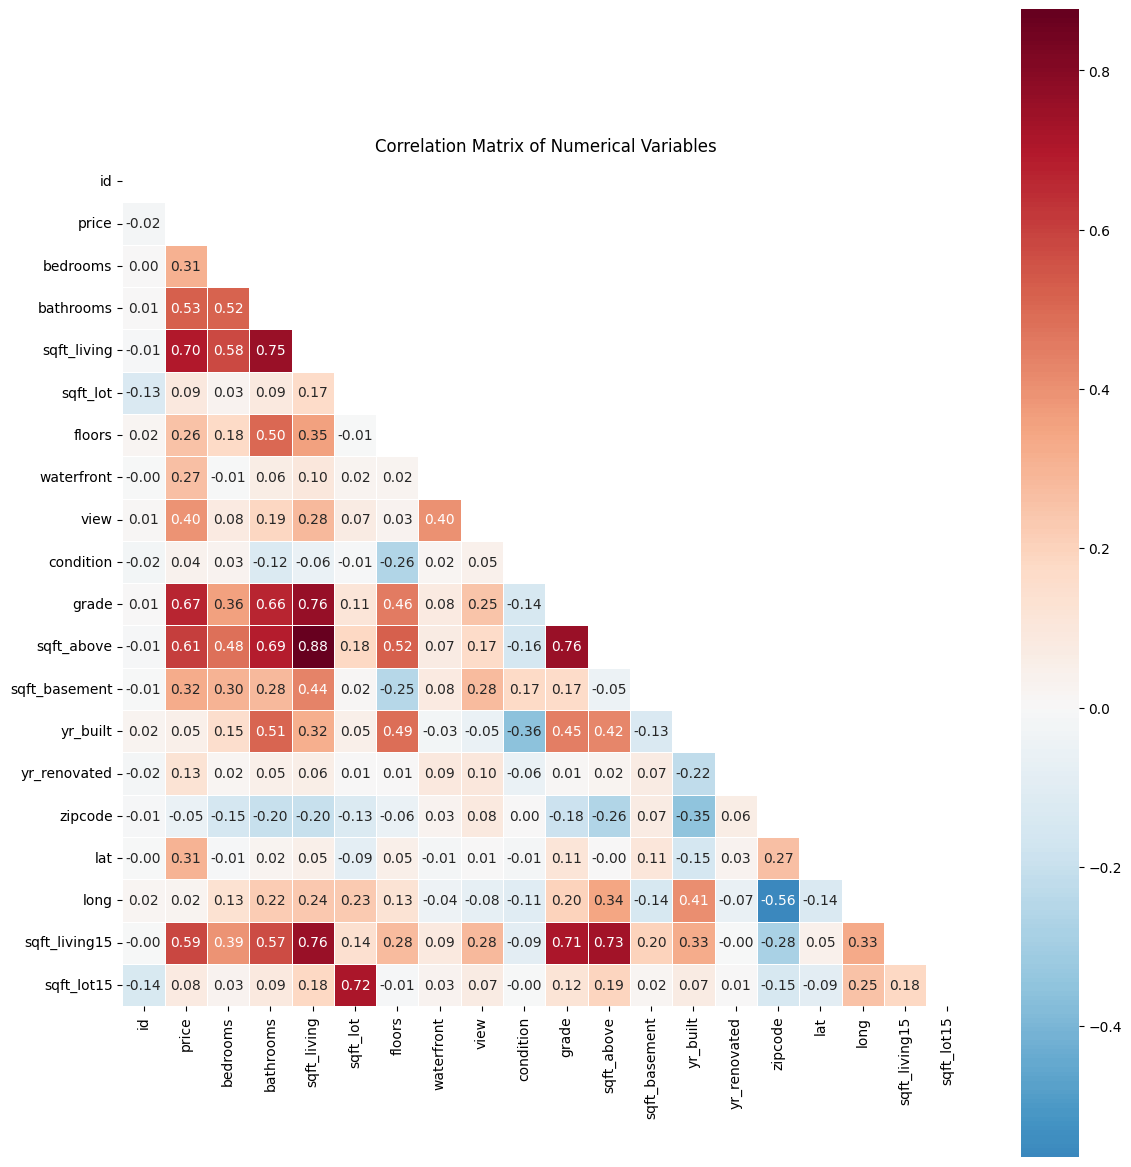

In [30]:
corr_matrix = df.corr(numeric_only=True)

#corr_matrix = num_cols.corr()

# Mask upper triangle to avoid duplication
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5,
)

plt.title("Correlation Matrix of Numerical Variables")
plt.xticks(rotation=90, ha="center")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

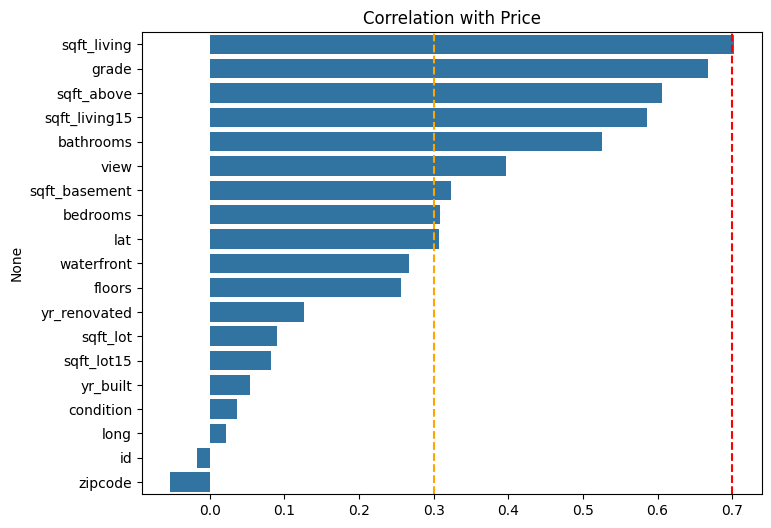

In [36]:
price_corr = corr_matrix["price"].drop("price").sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=price_corr.values,
            y=price_corr.index)

plt.axvline(0.3, color='orange', linestyle='--')  #checking lines of correlation importance
plt.axvline(0.7, color='red', linestyle='--')

plt.title("Correlation with Price")
plt.tight_layout
plt.show()

## 6: Handle categorical variables (encoding)

In [37]:
#zipcode

features = pd.get_dummies(features, columns=["zipcode"], drop_first=True)

## 7: Train baseline models


### 7.1 Linear Regression

In [43]:
#import library
from sklearn.linear_model import LinearRegression

#initialise the model

lr = LinearRegression()             #assign model a name

#fit the model

lr.fit(X_train, y_train)


r2score_train = lr.score(X_train, y_train)
r2score_test = lr.score(X_test, y_test)

print(f"R-Squared Train: {r2score_train}")
print(f"R-Squared Test: {r2score_test}")


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE train: {mse_train}")
print(f"MSE test: {mse_test}")

R-Squared Train: 0.7006472110679104
R-Squared Test: 0.7025786451758727
MSE train: 39110026896.87722
MSE test: 44963182577.291534


### 7.2 KNN

In [42]:
#KNN Manish
#from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, random_state= 23)

model2 = KNeighborsRegressor()
model2.fit(Xtrain, ytrain)

ytrain_pred = model2.predict(Xtrain)
ytest_pred = model2.predict(Xtest)
r2score_train = r2_score(ytrain, ytrain_pred)
r2score_test = r2_score(ytest, ytest_pred)
mse_train = mean_squared_error(ytrain, ytrain_pred)
mse_test = mean_squared_error(ytest, ytest_pred)
r2score_test, r2score_train

(0.49775559437399264, 0.6581639741783536)

In [46]:
#note for later: if time left, add Suzana's preprocessing, to make this work as an alt version

#Suzana KNN: on preprocessed data, which is why it's performing better
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


linreg = Pipeline(steps=[
  ("preprocess", preprocess),
  ("model", LinearRegression())
])

knn = Pipeline(steps=[
  ("preprocess", preprocess),
  ("model", KNeighborsRegressor(n_neighbors=5))
])
knn.fit(X_train, y_train)
linreg.fit(X_train, y_train)


from sklearn.metrics import r2_score, mean_absolute_error

def evaluate(name, model):
  pred = model.predict(X_test)
  r2 = r2_score(y_test, pred)
  mae = mean_absolute_error(y_test, pred)
  print(f"\n{name}")
  print("R² :", r2)
  print("MAE:", mae)
  return {"model": name, "r2": r2, "mae": mae}

results = []
results.append(evaluate("Linear Regression", linreg))
results.append(evaluate("KNN (k=5)", knn))



NameError: name 'preprocess' is not defined

Conclusion:
Linear Regression is the better baseline model (RSquared: 70%, no over/underfitting) vs the KNN (50% test, 66% train)

# 8 Evaluation Function

In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_regression_model(model, X_train, X_test, y_train, y_test, verbose=True):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    results = {
        "train_r2": r2_score(y_train, y_train_pred),
        "test_r2": r2_score(y_test, y_test_pred),
        "train_mse": mean_squared_error(y_train, y_train_pred),
        "test_mse": mean_squared_error(y_test, y_test_pred),
        "train_rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "test_rmse": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "train_mae": mean_absolute_error(y_train, y_train_pred),
        "test_mae": mean_absolute_error(y_test, y_test_pred),
    }

    if verbose:
        print("=== Model Evaluation ===")
        for k, v in results.items():
            print(f"{k}: {v:.4f}")

#9 Improve Your Models

Notes:
We checked four ensemble methods separately

## 9.1 ADA - Aitor

In [49]:
base_tree = DecisionTreeRegressor(max_depth=3)

ada = AdaBoostRegressor(
  estimator=base_tree,
  n_estimators=300,
  learning_rate=0.05,
  random_state=42
)

ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.05, n_estimators=300, random_state=42)

In [50]:
y_pred_ada = ada.predict(X_test)

evaluate_regression_model(ada, X_train, X_test, y_train, y_test)

=== Model Evaluation ===
train_r2: 0.6484
test_r2: 0.6038
train_mse: 45934057412.6900
test_mse: 59897302235.7434
train_rmse: 214322.3213
test_rmse: 244739.2536
train_mae: 170228.5139
test_mae: 178348.8534


Conclusion: ADA makes the linear regression worse. Why? Becuase most of the features have a linear correlation with price, which is why ADA Boost is not ideal.

## 9.2 XGB - Manish

In [69]:
import xgboost as xgb

#model
Xgdata = X.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y, test_size=0.2, random_state=32)

#scaled_xtrain= scaler2.fit_transform(xgdatatrain)
#scaled_xtest = scaler2.transform(xgdatatest)

model2.fit(xgdatatrain, ygdatatrain)
scaled_ytrain_pred = model2.predict(xgdatatrain)    #not actually scaled
scaled_ytest_pred = model2.predict(xgdatatest)      #not actually scaled


r2scorexgb_train = r2_score(ygdatatrain, scaled_ytrain_pred)
r2scorexgb_test = r2_score(ygdatatest, scaled_ytest_pred)
msexgb_train = mean_squared_error(ygdatatrain, scaled_ytrain_pred)
msexgb_test = mean_squared_error(ygdatatest, scaled_ytest_pred)
r2scorexgb_train, r2scorexgb_test
print(msexgb_train)
print(msexgb_test)

632007914.0770792
19167016388.19958


In [70]:
evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9952
test_r2: 0.8674
train_mse: 632007914.0771
test_mse: 19167016388.1996
train_rmse: 25139.7676
test_rmse: 138444.9941
train_mae: 17129.4426
test_mae: 65934.7525


Conclusion: Great training result (99.5%), but overfitting

##9.3 Random Forest - Suzana

In [63]:
#note: outliers removed here, scaler applied

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# train-test split (needed before modeling)
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=42
)

categorical_cols = X.select_dtypes(include=["object","category","bool"]).columns
numeric_cols = X.select_dtypes(include=["int64","float64"]).columns

numeric_transformer = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="median")),
  ("scaler", StandardScaler())# needed for KNN, helpful for linear
])

categorical_transformer = Pipeline(steps=[
  ("imputer", SimpleImputer(strategy="most_frequent")),
  ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
  transformers=[
  ("num", numeric_transformer, numeric_cols),
  ("cat", categorical_transformer, categorical_cols),
  ],
  remainder="drop"
)

#remove outliers

from sklearn.compose import ColumnTransformer

# Remove extreme price outliers (top/bottom 1%)
low, high = y.quantile(0.01), y.quantile(0.99)
df2 = df[(df['price'] >= low) & (df['price'] <= high)].copy()

#Split into features and target again (for the cleaned dataset)
X2 = df2.drop(columns=['price'])
y2 = df2['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42
)
# Treat zipcode as categorical (NOT outlier)
X2_train["zipcode"] = X2_train["zipcode"].astype("category")
X2_test["zipcode"] = X2_test["zipcode"].astype("category")

# Define which columns are numeric vs categorical
numeric_cols2 = [c for c in X2.columns if c != "zipcode"]

preprocess2 = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_cols2),
    ("cat", categorical_transformer, ["zipcode"]),
  ]
)

print("Original rows:", df.shape[0])
print("After removing outliers:", df2.shape[0])
print("Low cutoff:", low, "High cutoff:", high)

Original rows: 21613
After removing outliers: 21179
Low cutoff: 153500.36 High cutoff: 1964400.0000000051


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = Pipeline(steps=[
  ("preprocess", preprocess2),
  ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1,verbose=2))
])

rf.fit(X2_train, y2_train)


def evaluate2(name, model):
  pred = model.predict(X2_test)
  r2 = r2_score(y2_test, pred)
  mae = mean_absolute_error(y2_test, pred)
  print(f"\n{name}")
  print("R² :", r2)
  print("MAE:", mae)
  return {"model": name, "r2": r2, "mae": mae}

results.append(evaluate2("Random Forest", rf))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min


building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.9min


building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  6.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s



Random Forest
R² : 0.8726464218593966
MAE: 62913.487570189194


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished


In [67]:
evaluate_regression_model(rf, X2_train, X2_test, y2_train, y2_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s


=== Model Evaluation ===
train_r2: 0.9831
test_r2: 0.8726
train_mse: 1356321939.7603
test_mse: 10195793395.3873
train_rmse: 36828.2764
test_rmse: 100974.2214
train_mae: 22757.1040
test_mae: 62913.4876


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.5s finished


Conclusion: Random Forest has great train RSquared (98%), but overfitting (Test is 87%)

## 9.4 Gradient - Isis

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=12)
gbr.fit(X_train, y_train)

evaluate_regression_model(gbr, X_train, X_test, y_train, y_test)

=== Model Evaluation ===
train_r2: 0.9025
test_r2: 0.8554
train_mse: 12737134232.7499
test_mse: 21862322223.5074
train_rmse: 112858.9130
test_rmse: 147859.1297
train_mae: 71001.7880
test_mae: 80518.6890


Conclusion: Train RSquared is only 90%, but overfitting issue less pronounced.

##9.5 Feature Engineering

limited to RandomForest and XGB, our best models.

aitor: removign outliers (done for rf), changing price to logprice
manish: removing outliers, yr _> age, yr_reno -> bool
suzana: removing outliers, zipcode
isis: dropping sqft_basement, sqft_above

to do:
- remove outliers from xgboost - done
- drop sqft - done (xgb, good idea)
- yr _> age - done (xgb, good idea)
- yr_reno -> bool (xgb, no effect)
- view --> bool (xgb, no effect)
- gradient search xgb, set to 5

### 9.5.1 XGBoost

removing price outliers

In [72]:
# Remove extreme price outliers (top/bottom 1%)
low, high = y.quantile(0.01), y.quantile(0.99)
df_xgb = df[(df['price'] >= low) & (df['price'] <= high)].copy()

#Split into features and target again (for the cleaned dataset)
X2 = df_xgb.drop(columns=['price'])
y2 = df_xgb['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42)

#model
Xgdata = X2.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y2, test_size=0.2, random_state=32)


model2.fit(xgdatatrain, ygdatatrain)
ytrain_pred = model2.predict(xgdatatrain)    #not actually scaled
ytest_pred = model2.predict(xgdatatest)      #not actually scaled

In [73]:
#evaluate
evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9949
test_r2: 0.8726
train_mse: 415833457.6948
test_mse: 9798546056.2032
train_rmse: 20391.9949
test_rmse: 98987.6056
train_mae: 13389.6266
test_mae: 60657.9039


In [96]:
df_sqft = df[
    df["sqft_living"].between(
        df["sqft_living"].quantile(0.01),
        df["sqft_living"].quantile(0.99)
    )
]

#Split into features and target again (for the cleaned dataset)
X2 = df_sqft.drop(columns=['price'])
y2 = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42)

#i need to deal with zipcode again, so it's one hot encoded
df_sqft = pd.get_dummies(df_sqft, columns=["zipcode"], drop_first=True)

#model
Xgdata = X2.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y2, test_size=0.2, random_state=32)


model2.fit(xgdatatrain, ygdatatrain)
ytrain_pred = model2.predict(xgdatatrain)    #not actually scaled
ytest_pred = model2.predict(xgdatatest)      #not actually scaled

In [94]:
evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9951
test_r2: 0.8914
train_mse: 487626319.8489
test_mse: 10609322603.5553
train_rmse: 22082.2626
test_rmse: 103001.5660
train_mae: 14823.1905
test_mae: 62691.8042


Note: We tried ADA Boost with logprice, but since we removed outliers it doesn't make a big impact

In [98]:
#dropping redundant sqft_columns

#Split into features and target again (for the cleaned dataset)
X2 = df_sqft.drop(columns=['price','sqft_above','sqft_basement'])
y2 = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42)

#i need to deal with zipcode again, so it's one hot encoded
#df_sqft = pd.get_dummies(df_sqft, columns=["zipcode"], drop_first=True)

#model
Xgdata = X2.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y2, test_size=0.2, random_state=32)


model2.fit(xgdatatrain, ygdatatrain)
ytrain_pred = model2.predict(xgdatatrain)
ytest_pred = model2.predict(xgdatatest)


evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9925
test_r2: 0.8916
train_mse: 747475565.3625
test_mse: 10586419090.5187
train_rmse: 27339.9994
test_rmse: 102890.3255
train_mae: 18989.6164
test_mae: 62407.0163


Conclusion: Dropping SQft_basement and SQFT_above only very minimally impacts the model, so we can drop the columns for a simpler model. Since SQft_above + sqft_basement is sqft_living, they have high collinearity.

In [110]:
#extracting year from date

df_sqft['sale_year']=df_sqft['date'].str[:4]

#turning sale year into an int, so i can calculate house age
df_sqft['sale_year']=df_sqft['sale_year'].astype(np.int64)


In [111]:
df_sqft['house_age'] = df_sqft['sale_year'] - df_sqft['yr_built']

In [112]:
#including house age, sale year

X2 = df_sqft.drop(columns=['price','sqft_above','sqft_basement'])
y2 = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42)

#i need to deal with zipcode again, so it's one hot encoded
#df_sqft = pd.get_dummies(df_sqft, columns=["zipcode"], drop_first=True)

#model
Xgdata = X2.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y2, test_size=0.2, random_state=32)


model2.fit(xgdatatrain, ygdatatrain)
ytrain_pred = model2.predict(xgdatatrain)
ytest_pred = model2.predict(xgdatatest)


evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9932
test_r2: 0.8935
train_mse: 675535682.3685
test_mse: 10397317564.2848
train_rmse: 25991.0693
test_rmse: 101967.2377
train_mae: 18359.0084
test_mae: 61077.6246


In [113]:
#also turning yr_renovated into boolean

X2['yr_renovated'] = X2['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

X2 = df_sqft.drop(columns=['price','sqft_above','sqft_basement'])
y2 = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42)

#i need to deal with zipcode again, so it's one hot encoded
#df_sqft = pd.get_dummies(df_sqft, columns=["zipcode"], drop_first=True)

#model
Xgdata = X2.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y2, test_size=0.2, random_state=32)


model2.fit(xgdatatrain, ygdatatrain)
ytrain_pred = model2.predict(xgdatatrain)
ytest_pred = model2.predict(xgdatatest)


evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9932
test_r2: 0.8935
train_mse: 675535682.3685
test_mse: 10397317564.2848
train_rmse: 25991.0693
test_rmse: 101967.2377
train_mae: 18359.0084
test_mae: 61077.6246


In [114]:
#view boolean

X2["view_boolean"] = [0 if x == 0 else 1 for x in X2["view"]]

X2 = df_sqft.drop(columns=['price','sqft_above','sqft_basement'])
y2 = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42)

#i need to deal with zipcode again, so it's one hot encoded
#df_sqft = pd.get_dummies(df_sqft, columns=["zipcode"], drop_first=True)

#model
Xgdata = X2.drop('date',axis=1)    #referencing above X, where zipcode is already categorical

model2 = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10)
xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y2, test_size=0.2, random_state=32)


model2.fit(xgdatatrain, ygdatatrain)
ytrain_pred = model2.predict(xgdatatrain)
ytest_pred = model2.predict(xgdatatest)


evaluate_regression_model(model2, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9932
test_r2: 0.8935
train_mse: 675535682.3685
test_mse: 10397317564.2848
train_rmse: 25991.0693
test_rmse: 101967.2377
train_mae: 18359.0084
test_mae: 61077.6246


###9.5.2 Random Forest

In [118]:
#redundant sqft columns removed, sqft_outliers removed, house age added

#Split into features and target again (for the cleaned dataset)
X2 = df_sqft.drop(columns=['price'])
y2 = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42
)

preprocess2 = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_cols2),
   ## ("cat", categorical_transformer, ["zipcode"]),
  ]
)

print("Original rows:", df.shape[0])
print("After removing outliers:", df2.shape[0])
print("Low cutoff:", low, "High cutoff:", high)



rf = Pipeline(steps=[
  ("preprocess", preprocess2),
  ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1,verbose=2))
])

rf.fit(X2_train, y2_train)


evaluate_regression_model(rf, X2_train, X2_test, y2_train, y2_test)

Original rows: 21613
After removing outliers: 21179
Low cutoff: 153500.36 High cutoff: 1964400.0000000051


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.8s


building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79 of 200
building tree 80 of 200
building tree 81 of 200
building tree 82

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   43.4s


building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200
building tree 199 of 200
building tree 200 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   52.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s


=== Model Evaluation ===
train_r2: 0.9831
test_r2: 0.8602
train_mse: 1707492032.0999
test_mse: 13099778271.2244
train_rmse: 41321.8106
test_rmse: 114454.2628
train_mae: 24239.4241
test_mae: 65499.8693


[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished


Notes Aitor: ADA is not a good model for this kind of problem.
Feature Engineering: converting zipcode to categorical led to the best improvements

### 9.5.3 XGB Hyperparameter Tuning

In [127]:
df_sqft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21195 entries, 0 to 21612
Data columns (total 91 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21195 non-null  int64  
 1   date           21195 non-null  object 
 2   price          21195 non-null  float64
 3   bedrooms       21195 non-null  int64  
 4   bathrooms      21195 non-null  float64
 5   sqft_living    21195 non-null  int64  
 6   sqft_lot       21195 non-null  int64  
 7   floors         21195 non-null  float64
 8   waterfront     21195 non-null  int64  
 9   view           21195 non-null  int64  
 10  condition      21195 non-null  int64  
 11  grade          21195 non-null  int64  
 12  sqft_above     21195 non-null  int64  
 13  sqft_basement  21195 non-null  int64  
 14  yr_built       21195 non-null  int64  
 15  yr_renovated   21195 non-null  int64  
 16  lat            21195 non-null  float64
 17  long           21195 non-null  float64
 18  sqft_living

In [158]:


Xgdata=df_sqft.drop(['price','date','id'], axis = 1)
y = df_sqft['price']

xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y, test_size=0.2, random_state=32)

estimato = xgb.XGBRegressor()

param_grids = {'n_estimators':[100, 150, 200, 250, 300], 'learning_rate': [0.01, 0.1, 0.001, 0.4, 0.9], 'max_depth': [3, 5, 7]}
clf = GridSearchCV(estimator= estimato, param_grid=param_grids, cv = 5, verbose = 3, scoring= 'r2', n_jobs=-1)
#sorted(clf.cv_results_.keys())
clf.fit(xgdatatrain, ygdatatrain)
#GridSearchCV(estimator= estimato,
#             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
#sorted(clf.cv_results_.keys())
print("Best Parameters:", clf.best_params_)
print("Best CV Score (Validation):", clf.best_score_)
best_model = clf.best_estimator_
test_score = best_model.score(xgdatatest, ygdatatest)

print("Final R2 Score on Test Set:", test_score)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best CV Score (Validation): 0.8940725064368577
Final R2 Score on Test Set: 0.9071460870016116


In [159]:
evaluate_regression_model(best_model, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9570
test_r2: 0.9071
train_mse: 4300432392.8546
test_mse: 9067113808.9792
train_rmse: 65577.6821
test_rmse: 95221.3937
train_mae: 45672.8331
test_mae: 59339.3464


result: Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

In [153]:
df_sqft.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98022', 'zipcode_98023', 'zipcode_98024',
       'zipcode_98027', 'zipcode_98028', 'zipcode_98029', 'zipcode_98030',
       'zipcode_98031', 'zipcode_98032', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipc

In [161]:
#xgboost with a lot fewer columns

Xgdata=df_sqft.drop(['price','date','id','floors','sqft_above','sqft_basement','lat','long','sale_year'], axis = 1)
y = df_sqft['price']

xgdatatrain, xgdatatest, ygdatatrain,ygdatatest = train_test_split(Xgdata, y, test_size=0.2, random_state=32)

estimato = xgb.XGBRegressor()

param_grids = {'n_estimators':[100, 150, 200, 250, 300], 'learning_rate': [0.01, 0.1, 0.001, 0.4, 0.9], 'max_depth': [3, 5, 7]}
clf = GridSearchCV(estimator= estimato, param_grid=param_grids, cv = 5, verbose = 3, scoring= 'r2', n_jobs=-1)
#sorted(clf.cv_results_.keys())
clf.fit(xgdatatrain, ygdatatrain)
#GridSearchCV(estimator= estimato,
#             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
#sorted(clf.cv_results_.keys())
print("Best Parameters:", clf.best_params_)
print("Best CV Score (Validation):", clf.best_score_)
best_model = clf.best_estimator_
test_score = best_model.score(xgdatatest, ygdatatest)

print("Final R2 Score on Test Set:", test_score)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Best Parameters: {'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 300}
Best CV Score (Validation): 0.8660786129853119
Final R2 Score on Test Set: 0.8710486376496411


In [162]:
best_model_reduced = best_model

evaluate_regression_model(best_model_reduced, xgdatatrain, xgdatatest, ygdatatrain, ygdatatest)

=== Model Evaluation ===
train_r2: 0.9332
test_r2: 0.8710
train_mse: 6669987109.2936
test_mse: 12592002216.1469
train_rmse: 81669.9890
test_rmse: 112214.0910
train_mae: 56743.5930
test_mae: 69977.4529


### 9.5.4 Random Forest Hyperparameters

In [150]:


#Split into features and target again (for the cleaned dataset)
X2 = df_sqft.drop(['price'], axis = 1)
y = df_sqft['price']

#Train/test split again
X2_train, X2_test, y2_train, y2_test = train_test_split(
  X2, y2, test_size=0.2, random_state=42
)
"""
preprocess2 = ColumnTransformer(
  transformers=[
    ("num", numeric_transformer, numeric_cols2),
   ## ("cat", categorical_transformer, ["zipcode"]),
  ]
)

#print("Original rows:", df.shape[0])
#print("After removing outliers:", df2.shape[0])
#print("Low cutoff:", low, "High cutoff:", high)


rf = Pipeline(steps=[
  ("preprocess", preprocess2),
  ("model", RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1,verbose=2))
])



rf.fit(X2_train, y2_train). #can we skip building the trees if we already had
"""

#estimato = RandomForestRegressor()

param_grids = {'n_estimators':[100, 150, 200, 250, 300], 'max_depth': [3, 5, 7]}
clf = GridSearchCV(estimator= RandomForestRegressor(), param_grid=param_grids, cv = 5, verbose = 3, scoring= 'r2', n_jobs=-1)
#sorted(clf.cv_results_.keys())
clf.fit(X2_train, y2_train)
#GridSearchCV(estimator= estimato,
#             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
#sorted(clf.cv_results_.keys())
print("Best Parameters:", clf.best_params_)
print("Best CV Score (Validation):", clf.best_score_)
best_model = clf.best_estimator_
test_score = best_model.score(X2_test, y2_test)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'max_depth': 7, 'n_estimators': 300}
Best CV Score (Validation): 0.8166543233479168


In [151]:
evaluate_regression_model(best_model, X2_train, X2_test, y2_train, y2_test)

=== Model Evaluation ===
train_r2: 0.8510
test_r2: 0.7947
train_mse: 15033559781.7049
test_mse: 19244659066.3376
train_rmse: 122611.4178
test_rmse: 138725.1205
train_mae: 79464.2281
test_mae: 84701.9583


Conclusion: we restricted the depth, so model performance got worse.